# 5. Drzewa decyzyjne

Przykład drzewa decyzyjnego użytego do regresji/aproksymacji prostego modelu. 

Drzewo tworzy reguły dzielące dziedzinę funkcji na N przedziałów, uśredniając w każdym przedziale wartości aproksymowanej funkcji.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import random as rng
from sklearn import tree

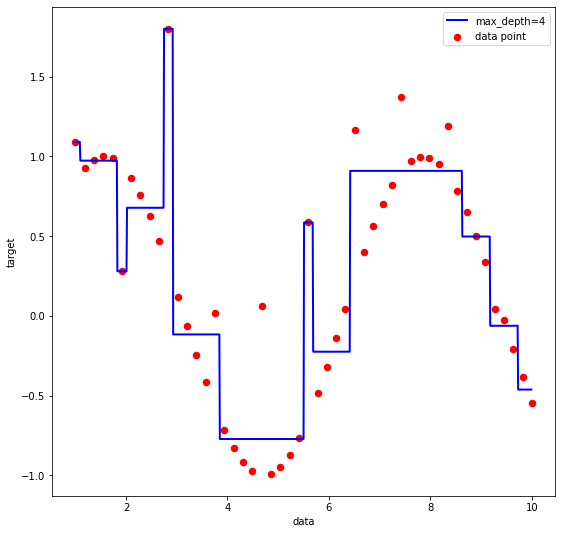

[Text(0.4375, 0.9, 'X[0] <= 2.929\nsquared_error = 0.519\nsamples = 50\nvalue = 0.264'),
 Text(0.20833333333333334, 0.7, 'X[0] <= 2.745\nsquared_error = 0.14\nsamples = 11\nvalue = 0.888'),
 Text(0.16666666666666666, 0.5, 'X[0] <= 1.827\nsquared_error = 0.062\nsamples = 10\nvalue = 0.797'),
 Text(0.08333333333333333, 0.3, 'X[0] <= 1.092\nsquared_error = 0.003\nsamples = 5\nvalue = 0.996'),
 Text(0.041666666666666664, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 1.09'),
 Text(0.125, 0.1, 'squared_error = 0.001\nsamples = 4\nvalue = 0.973'),
 Text(0.25, 0.3, 'X[0] <= 2.01\nsquared_error = 0.043\nsamples = 5\nvalue = 0.598'),
 Text(0.20833333333333334, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 0.279'),
 Text(0.2916666666666667, 0.1, 'squared_error = 0.022\nsamples = 4\nvalue = 0.677'),
 Text(0.25, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 1.8'),
 Text(0.6666666666666666, 0.7, 'X[0] <= 6.418\nsquared_error = 0.485\nsamples = 39\nvalue = 0.088'),
 Text(0.5, 0.5, 'X[0] <= 5.5\

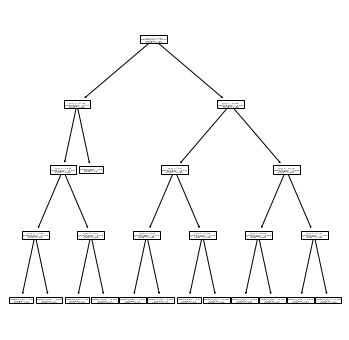

In [ ]:
rng = np.random.RandomState(1)
X = np.linspace(1,10,50).reshape(-1,1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(len(y[::5])))

# Fit the model with a maximal depth
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X, y)

X_test = np.arange(1, 10.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

#Plots
plt.figure(figsize = (9,9))
plt.scatter(X, y, s=20, c='red', label="data point", linewidth=3)
plt.plot(X_test, y_1, color="blue", label="max_depth=4", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.show()

plt.figure(figsize = (6,6))
tree.plot_tree(regr_1)

# Zadanie I

1. Zaimplementuj AI grającą sama z sobą w kółko i krzyżyk. Użyj strategii minimax oraz alpha-beta pruning do przycinania gałęzi drzewa.

In [1]:
#Poniższy template jest pomocą w rozwiązaniu zadania, natomiast nie jest obowiązkowy. 
import numpy as np

class tic_tac_toe:
  def __init__(self):
    self.board_x_size = 3 
    self.board_y_size = 3
    self.board = np.zeros((3, 3), dtype=int)

  def play(self):
    who_won = -10
    # Zakładamy x_size*y_size ruchów, chyba że ktoś wcześniej wygra, wtedy wyjdziemy break'iem
    for i in range(self.board_x_size*self.board_y_size):
      best_move = (-1,-1)
      if (i%2 == 0): # ruch gracza A
        best_val = -10
        for x in range(self.board_x_size):
          for y in range(self.board_y_size):
            if self.board[x][y] == 0:
              self.board[x][y] = 1
              self_min = self.min()
              self.board[x][y] = 0
              if self_min > best_val:
                best_val = self_min
                best_move = (x,y)
        self.board[best_move[0]][best_move[1]] = 1

      else: # ruch gracza B
        best_val = 10
        for x in range(self.board_x_size):
          for y in range(self.board_y_size):
            if self.board[x][y] == 0:
              self.board[x][y] = -1
              self_max = self.max()
              self.board[x][y] = 0
              if self_max < best_val:
                best_val = self_max
                best_move = (x,y)
        self.board[best_move[0]][best_move[1]] = -1

      who_won = self.check_win()
      if(who_won==1 or who_won==-1):
        break

    return self.board, who_won

  def check_rows_and_cols(self):
      for row in range(3) :    
          if (self.board[row][0] == self.board[row][1] and self.board[row][1] == self.board[row][2]) :       
              return self.board[row][0]
      for col in range(3) :
          if (self.board[0][col] == self.board[1][col] and self.board[1][col] == self.board[2][col]) :
              return self.board[0][col]
      return 0

  def check_diagonals(self):
    if (self.board[0][0] == self.board[1][1] and self.board[1][1] == self.board[2][2]) :
        return self.board[0][0]
 
    if (self.board[0][2] == self.board[1][1] and self.board[1][1] == self.board[2][0]) :
        return self.board[0][2]

  def check_win(self):
    # 2 - gra jeszcze trwa
    # 1 - wygrana gracza A
    # -1 - wygrana gracza B
    # 0 - remis
    if self.check_rows_and_cols() == 1 or self.check_diagonals() == 1:
      return 1
    elif self.check_rows_and_cols() == -1 or self.check_diagonals() == -1:
      return -1
    elif self.board.all():
      return 0
    else:
      return 2


  # maksymalizuj wypłatę gracza
  def max(self):
    current_best = -100000

    score = self.check_win()
    if score != 2:
     return score
    
    for x in range(self.board_x_size):
      for y in range(self.board_y_size):
        if(self.board[x][y] == 0):
          self.board[x][y] = 1
          minimized = self.min()
          self.board[x][y] = 0
          if minimized > current_best:
            current_best = minimized
    return current_best

  # minimalizuj wypłatę gracza
  def min(self):
    current_best = 10000

    score = self.check_win()
    if score != 2:
     return score

    for x in range(self.board_x_size):
      for y in range(self.board_y_size):
        if(self.board[x][y] == 0):
          self.board[x][y] = -1
          maximized = self.max()
          self.board[x][y] = 0
          if maximized < current_best:
            current_best = maximized
    return current_best

game = tic_tac_toe()
game.check_win()
(board, who_won) = game.play()
print("AI vs AI, the only possible outcoming board:")
print(board)
A_won = 0
B_won = 0
AB_tie = 0

if who_won==1:
  A_won = 1
elif who_won==1:
  B_won = 1
else:
  AB_tie = 1

print("-------------------")
print("Game result: A: {} , AB tie: {} , B: {}".format(A_won, AB_tie, B_won))


AI vs AI, the only possible outcoming board:
[[ 1  1 -1]
 [-1 -1  1]
 [ 1 -1  1]]
-------------------
Game result: A: 0 , AB tie: 1 , B: 0
